In [195]:
import os
import pandas as pd
import pylab as pl
import numpy as np
import scipy.stats
%pylab inline

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


In [196]:
date_w = '201412'
date_s = '201507'
getCitiBikeCSV(date_w)
getCitiBikeCSV(date_s)

file in place, you can continue
file in place, you can continue


In [197]:
df_w = pd.read_csv(os.getenv("PUIDATA") + "/" + date_w + '-citibike-tripdata.csv')

In [198]:
df_s = pd.read_csv(os.getenv("PUIDATA") + "/" + date_s + '-citibike-tripdata.csv')

In [199]:
data = [df_w, df_s]
df = pd.concat(data, ignore_index=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988.0,2
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983.0,1
3,1126,12/1/2014 00:02:17,12/1/2014 00:21:03,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,21142,Customer,NaN,0
4,331,12/1/2014 00:02:21,12/1/2014 00:07:52,519,Pershing Square North,40.751873,-73.977706,527,E 33 St & 2 Ave,40.744023,-73.976056,18679,Subscriber,1986.0,2


In [200]:
df['hour'] = pd.to_datetime(df['starttime'], format ="%m/%d/%Y %H:%M:%S").dt.hour

In [201]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],axis=1, inplace = True)

In [204]:
df.head()

,tripduration,hour
0,1257,0
1,275,0
2,450,0
3,1126,0
4,331,0


In [205]:
df['Day'] = df['tripduration'][(df['hour'] <= 18) & (df['hour'] >= 6)]
df['Night'] = df['tripduration'][((df['hour'] > 18) & (df['hour'] <= 23)) | ((df['hour'] >= 0) & (df['hour'] < 6))]

In [206]:
df.head()

,tripduration,hour,Day,Night
0,1257,0,NaN,1257.0
1,275,0,NaN,275.0
2,450,0,NaN,450.0
3,1126,0,NaN,1126.0
4,331,0,NaN,331.0


In [207]:
df['Day'].dropna(inplace= True)
df['Night'].dropna(inplace= True)

Text(0.5,1,'Trip Duration in Night Time')

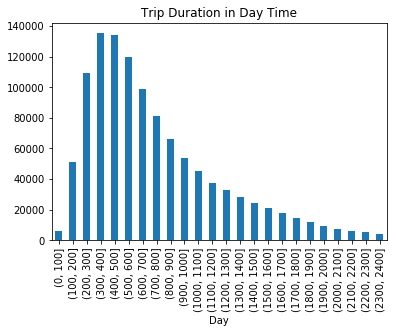

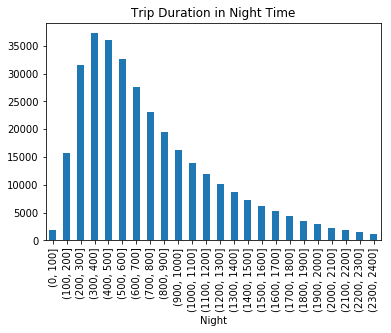

In [208]:
bins = np.arange(0,2500, 100)
axD = df.Day.groupby(pd.cut(df.Day, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Trip Duration in Day Time")
axN = df.Night.groupby(pd.cut(df.Night, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Trip Duration in Night Time")

              count_nonzero
Day                        
(0, 100]           0.000809
(100, 200]         0.003937
(200, 300]         0.003784
(300, 400]         0.001400
(400, 500]         0.009039
(500, 600]         0.014789
(600, 700]         0.017622
(700, 800]         0.018191
(800, 900]         0.016824
(900, 1000]        0.013941
(1000, 1100]       0.011208
(1100, 1200]       0.007771
(1200, 1300]       0.005618
(1300, 1400]       0.003941
(1400, 1500]       0.002917
(1500, 1600]       0.002432
(1600, 1700]       0.002034
(1700, 1800]       0.001610
(1800, 1900]       0.001431
(1900, 2000]       0.000980
(2000, 2100]       0.000626
(2100, 2200]       0.000142
(2200, 2300]       0.000138
(2300, 2400]       0.000000


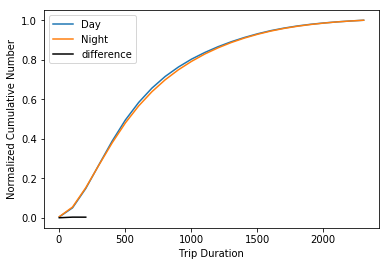

In [209]:
csD=df.Day.groupby(pd.cut(df.Day, bins)).agg([count_nonzero]).cumsum()
csN=df.Night.groupby(pd.cut(df.Night, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### K-S Test
### Null hypothesis:  Trip duration during the day and trip duration during the night are drawn from the same continuous distribution.
### Significant level: 0.05

In [210]:
ks = scipy.stats.ks_2samp(df.Day, df.Night)
print(ks)

Ks_2sampResult(statistic=0.015403941149925493, pvalue=1.9769565682947324e-53)


In [214]:
len(df.Day)

1154015

In [215]:
len(df.Night)

330730

In [218]:
(((1154015+330730) /(330730*1154015))**0.5) * 1.36

0.0026823924727575406

With significant level 0.05, c($\alpha$) = 1.36 and the critical value is 0.00268 to reject null hypothesis.

The ks test statistics is 0.0154 and the p-value is 1.9e-53 which is extremely small. The test statistics is larger than the critial value and the p-value is smaller than the significant level so we reject the null hypothesis and states that trip duration of day and night time are not drawn from the same distribution.

### With reduced dataset

In [211]:
np.random.seed(99)
Dr = np.random.choice(df['Day'], size=200, replace=True, p=None)
Nr = np.random.choice(df['Night'], size=200, replace=True, p=None)
Dr.sort()
Nr.sort()
ks1 = scipy.stats.ks_2samp(Dr, Nr)
print(ks1)

Ks_2sampResult(statistic=0.080000000000000016, pvalue=0.52718940708578932)


In [219]:
(((200+200)/(200*200))**0.5) * 1.36

0.136

With significant level 0.05, c($\alpha$) = 1.36 and the critical value is 0.136 to reject null hypothesis.

The ks test statistics is 0.08 and the p-value is 0.527. The test statistics is 0.08 which is smaller than critical value 0.136 and the p-value is larger than the significant level so we fail to reject the null hypothesis and states that trip duration of day and night time are drawn from the same distribution. 

### Pearson's Test
### Null hypothesis: There is no linear relationship between trip duration of bikers that ride during the day and the night.
### Significant level: 0.05

In [212]:
np.random.seed(99)
D1 = np.random.choice(df['Day'], size=5000, replace=True, p=None)
N1 = np.random.choice(df['Night'], size=5000, replace=True, p=None)
D1.sort()
N1.sort()
ps = scipy.stats.pearsonr(D1,N1)
print(ps)

(0.71516094383866669, 0.0)


The pearson's correlation coefficient is 0.715 so the trip duration during day and night is strongly correlated. The p-value is 0 (should be extremely small so it approximate to zero) which is smaller than the significant level so we reject the null hypothesis and state that there is a linear relationship between trip duration during day and night. 

### Spearman's Test
### Null hypothesis: There is no monotonic relationship for trip duration of bikers that ride during the day and the night.
### Significant level: 0.05

In [213]:
sp = scipy.stats.spearmanr(D1,N1)
print(sp)

SpearmanrResult(correlation=0.99999895196685429, pvalue=0.0)


The spearman's correlation coefficient is 0.999 so the trip duration during day and night is strongly correlated. The p-value is 0 (should be extremely small so it approximate to zero) which is smaller than the significant level so we reject the null hypothesis and state that there is a monotonic relationship between trip duration during day and night. 